<a href="https://colab.research.google.com/github/SaChIn5419/Data-science-workshop-/blob/main/data_analysis_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Load the data from "superstore.csv" into a dataframe.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the head and info of the DataFrame to inspect it.



In [13]:
import pandas as pd
df = pd.read_csv('superstore.csv', encoding='latin-1')
display(df.head())
display(df.info())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

## Data cleaning

### Subtask:
Handle any missing values and outliers in the data. Ensure data types are appropriate for time series analysis.


**Reasoning**:
Check for missing values, convert date columns to datetime objects, and examine data types of relevant columns for time series analysis.



In [3]:
print("Missing values before handling:")
display(df.isnull().sum())

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print("\nData types after date conversion:")
display(df.info())

Missing values before handling:


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0



Data types after date conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object

None

**Reasoning**:
Identify potential outliers in 'Sales' and 'Profit' using box plots to understand their distribution and extreme values.



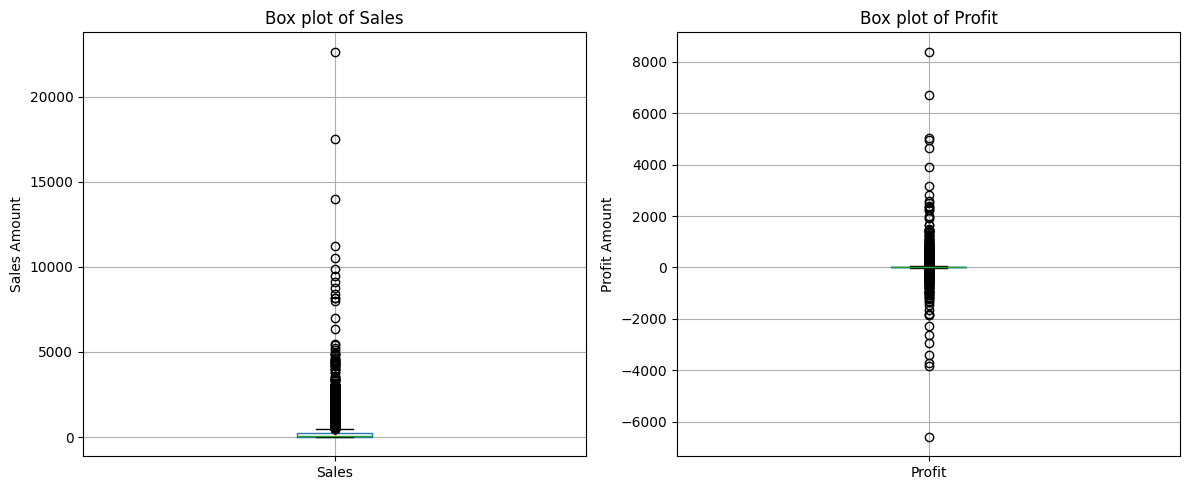

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='Sales')
plt.title('Box plot of Sales')
plt.ylabel('Sales Amount')

plt.subplot(1, 2, 2)
df.boxplot(column='Profit')
plt.title('Box plot of Profit')
plt.ylabel('Profit Amount')

plt.tight_layout()
plt.show()

**Reasoning**:
Based on the box plots, there are clear outliers in both 'Sales' and 'Profit'. For the purpose of time series analysis and to avoid the disproportionate influence of these extreme values, I will cap the outliers in both columns using the 99th and 1st percentiles respectively.



Outliers in 'Sales' and 'Profit' have been capped.


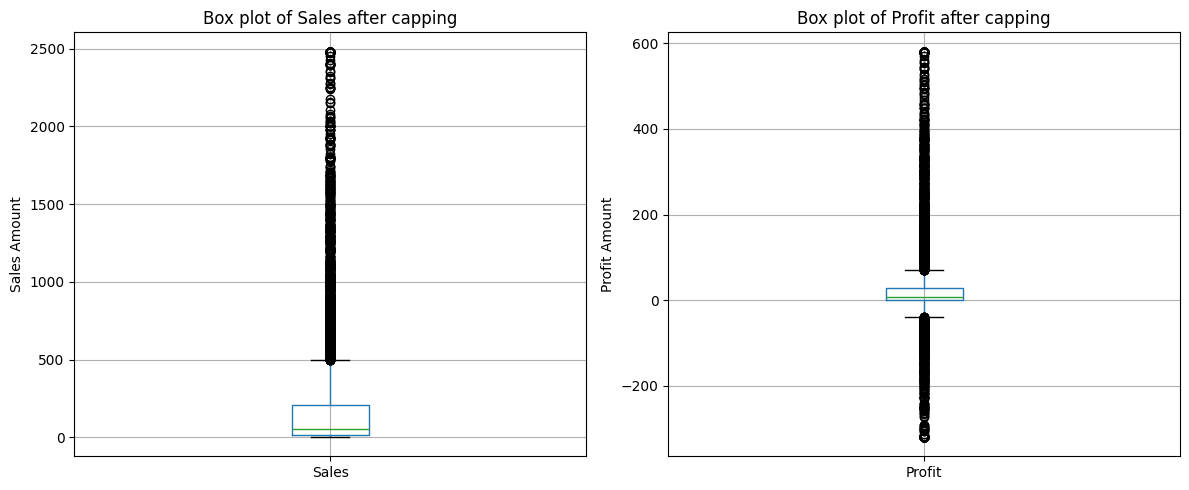

In [5]:
Q1_sales = df['Sales'].quantile(0.01)
Q3_sales = df['Sales'].quantile(0.99)
df['Sales'] = df['Sales'].clip(lower=Q1_sales, upper=Q3_sales)

Q1_profit = df['Profit'].quantile(0.01)
Q3_profit = df['Profit'].quantile(0.99)
df['Profit'] = df['Profit'].clip(lower=Q1_profit, upper=Q3_profit)

print("Outliers in 'Sales' and 'Profit' have been capped.")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='Sales')
plt.title('Box plot of Sales after capping')
plt.ylabel('Sales Amount')

plt.subplot(1, 2, 2)
df.boxplot(column='Profit')
plt.title('Box plot of Profit after capping')
plt.ylabel('Profit Amount')

plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Extract the time series data for sales and profit. Aggregate the data to a suitable time granularity (e.g., daily, weekly, or monthly) for forecasting.


**Reasoning**:
Select the relevant columns, set the index, and resample the data to monthly frequency.



In [6]:
monthly_data = df.set_index('Order Date')[['Sales', 'Profit']].resample('M').sum()
display(monthly_data.head())
display(monthly_data.info())

<ipython-input-6-a6f0baaf0961>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.set_index('Order Date')[['Sales', 'Profit']].resample('M').sum()


,Sales,Profit
Order Date,,
2014-01-31,14144.7696,2285.772829
2014-02-28,4521.0980,862.308400
2014-03-31,34517.8392,2164.274070
2014-04-30,26612.9896,3577.546247
2014-05-31,23414.0516,2055.575429


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-31 to 2017-12-31
Freq: ME
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
 1   Profit  48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


None

## Data exploration

### Subtask:
Analyze the time series data to understand trends, seasonality, and any potential anomalies in sales and profit. Visualize the time series data.


**Reasoning**:
Plot the 'Sales' and 'Profit' time series from the `monthly_data` DataFrame as instructed.



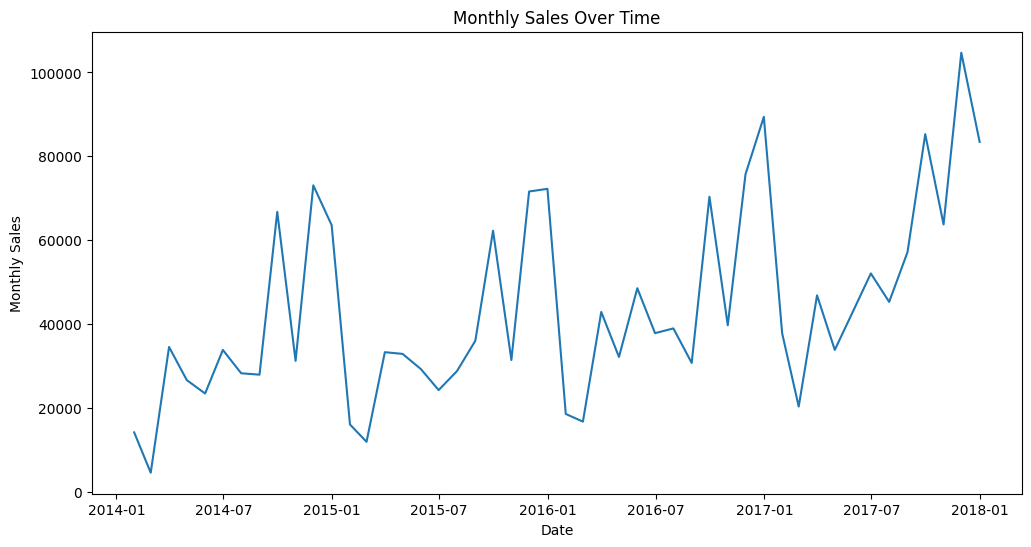

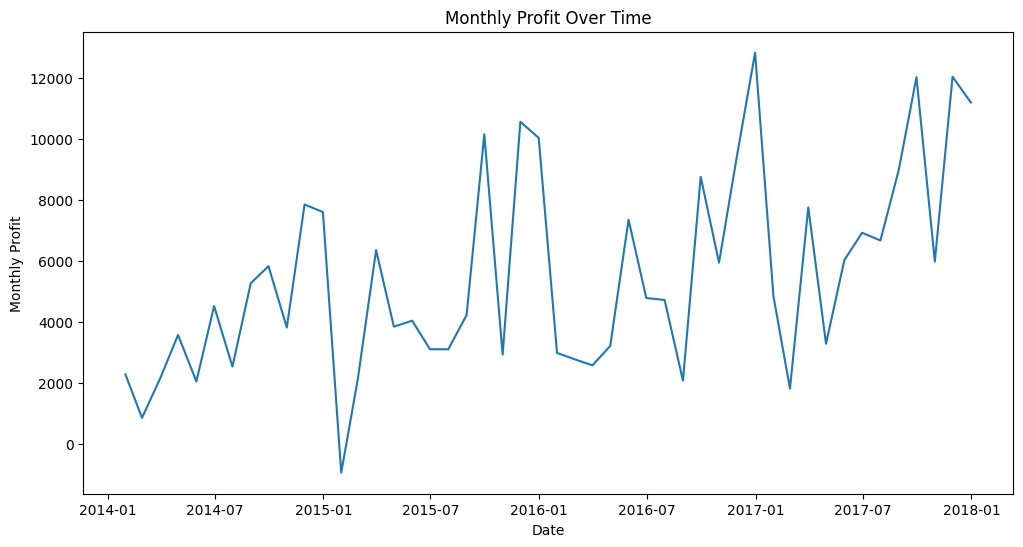

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Profit')
plt.title('Monthly Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Profit')
plt.show()

## Data splitting

### Subtask:
Split the time series data into training and testing sets.


**Reasoning**:
Split the monthly time series data into training and testing sets, using the last 12 months for testing.



In [8]:
train_size = len(monthly_data) - 12
train_data = monthly_data.iloc[:train_size]
test_data = monthly_data.iloc[train_size:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

display(train_data.head())
display(test_data.head())

Training data shape: (36, 2)
Testing data shape: (12, 2)


,Sales,Profit
Order Date,,
2014-01-31,14144.7696,2285.772829
2014-02-28,4521.0980,862.308400
2014-03-31,34517.8392,2164.274070
2014-04-30,26612.9896,3577.546247
2014-05-31,23414.0516,2055.575429


,Sales,Profit
Order Date,,
2017-01-31,37772.2210,4854.840357
2017-02-28,20301.6314,1819.421694
2017-03-31,46837.5620,7754.225011
2017-04-30,33818.2215,3288.590511
2017-05-31,43063.6494,6028.524858


## Model training

### Subtask:
Train a time series forecasting model (e.g., ARIMA, SARIMA, Prophet) on the training data to predict future sales and profit.


**Reasoning**:
Import the necessary SARIMA model and train two separate SARIMA models for 'Sales' and 'Profit' using the training data.



In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA model for Sales
# Using a common starting point for orders (p, d, q) = (1, 1, 1) and seasonal orders (P, D, Q, S) = (1, 1, 1, 12)
sarima_sales_model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_sarima_sales_model = sarima_sales_model.fit()

# Train SARIMA model for Profit
sarima_profit_model = SARIMAX(train_data['Profit'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_sarima_profit_model = sarima_profit_model.fit()

print("SARIMA models fitted successfully.")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA models fitted successfully.


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model evaluation

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate time series forecasting metrics (e.g., RMSE, MAE).


**Reasoning**:
Make predictions using the fitted models and calculate RMSE and MAE for both Sales and Profit.



In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the test data
sales_predictions = fitted_sarima_sales_model.predict(start=len(train_data), end=len(monthly_data)-1)
profit_predictions = fitted_sarima_profit_model.predict(start=len(train_data), end=len(monthly_data)-1)

# Ensure predictions have the same index as test_data for accurate comparison
sales_predictions.index = test_data.index
profit_predictions.index = test_data.index

# Calculate RMSE and MAE for Sales
rmse_sales = np.sqrt(mean_squared_error(test_data['Sales'], sales_predictions))
mae_sales = mean_absolute_error(test_data['Sales'], sales_predictions)

# Calculate RMSE and MAE for Profit
rmse_profit = np.sqrt(mean_squared_error(test_data['Profit'], profit_predictions))
mae_profit = mean_absolute_error(test_data['Profit'], profit_predictions)

# Print the evaluation metrics
print(f"Sales - RMSE: {rmse_sales:.2f}, MAE: {mae_sales:.2f}")
print(f"Profit - RMSE: {rmse_profit:.2f}, MAE: {mae_profit:.2f}")

Sales - RMSE: 11484.89, MAE: 10191.81
Profit - RMSE: 2235.59, MAE: 1888.78


## Data analysis

### Subtask:
Analyze the model's predictions and compare them to the actual values to identify periods of low sales or profit and high loss. Investigate potential causes for these issues by examining other features in the dataset (e.g., product categories, regions, customer segments).


**Reasoning**:
Combine the actual and predicted values into a single DataFrame for easier comparison and visualize the actual vs. predicted values over time using line plots to visually identify discrepancies.



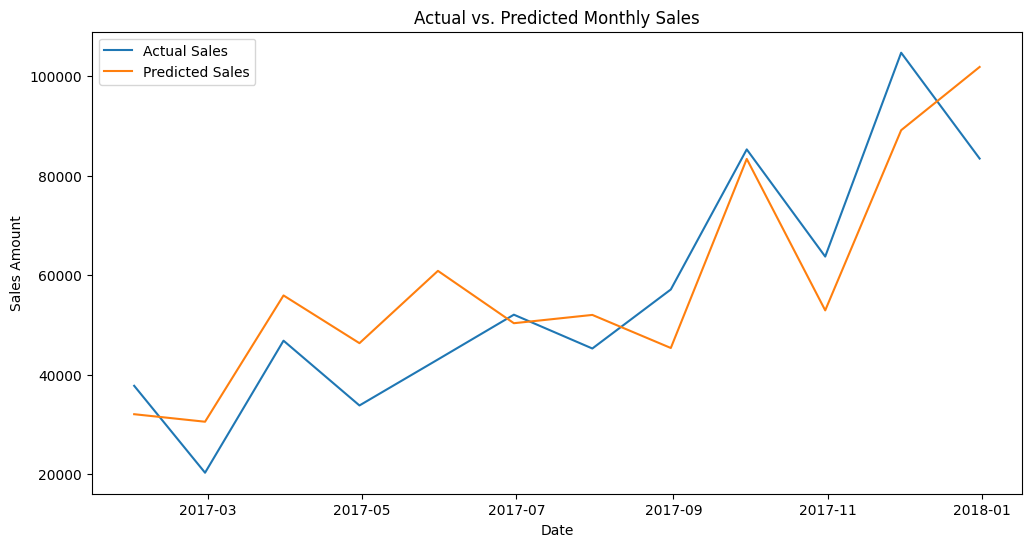

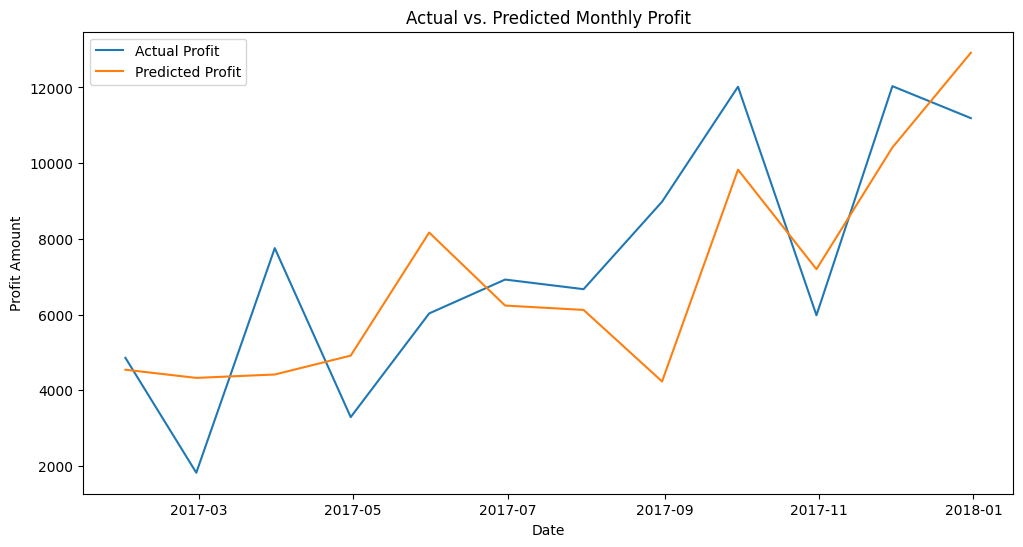

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine actual and predicted values for Sales
sales_comparison = pd.DataFrame({
    'Actual Sales': test_data['Sales'],
    'Predicted Sales': sales_predictions
})

# Combine actual and predicted values for Profit
profit_comparison = pd.DataFrame({
    'Actual Profit': test_data['Profit'],
    'Predicted Profit': profit_predictions
})

# Visualize Actual vs. Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(sales_comparison.index, sales_comparison['Actual Sales'], label='Actual Sales')
plt.plot(sales_comparison.index, sales_comparison['Predicted Sales'], label='Predicted Sales')
plt.title('Actual vs. Predicted Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

# Visualize Actual vs. Predicted Profit
plt.figure(figsize=(12, 6))
plt.plot(profit_comparison.index, profit_comparison['Actual Profit'], label='Actual Profit')
plt.plot(profit_comparison.index, profit_comparison['Predicted Profit'], label='Predicted Profit')
plt.title('Actual vs. Predicted Monthly Profit')
plt.xlabel('Date')
plt.ylabel('Profit Amount')
plt.legend()
plt.show()

**Reasoning**:
Calculate the residuals for Sales and Profit, identify periods with significantly low actual sales or profit, or significantly high negative profit (loss), filter the original dataframe for these periods, and analyze the filtered data to identify patterns or common factors.



Periods identified for further analysis (based on actual values in test set):


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-10-31'],
              dtype='datetime64[ns]', name='Order Date', freq=None)


Analyzing data for the identified periods:

Distribution of Categories in low performance/high loss periods:


,proportion
Category,
Office Supplies,0.599183
Furniture,0.209452
Technology,0.191365



Distribution of Regions in low performance/high loss periods:


,proportion
Region,
West,0.320887
East,0.270128
Central,0.252625
South,0.156359



Distribution of Customer Segments in low performance/high loss periods:


,proportion
Segment,
Consumer,0.476079
Corporate,0.294632
Home Office,0.229288



Distribution of Ship Modes in low performance/high loss periods:


,proportion
Ship Mode,
Standard Class,0.591015
Second Class,0.183197
First Class,0.180280
Same Day,0.045508



Profit distribution in low performance/high loss periods:


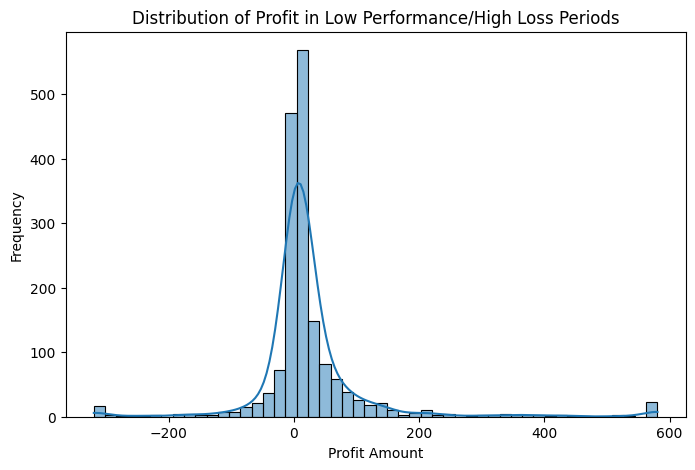

In [12]:
# Calculate residuals
sales_comparison['Sales Residuals'] = sales_comparison['Actual Sales'] - sales_comparison['Predicted Sales']
profit_comparison['Profit Residuals'] = profit_comparison['Actual Profit'] - profit_comparison['Predicted Profit']

# Identify periods of low performance or high loss based on actual values in test_data
# Defining thresholds for low sales, low profit, and high loss
# Using a simple approach: below the overall average of actual values in the test set
avg_actual_sales_test = test_data['Sales'].mean()
avg_actual_profit_test = test_data['Profit'].mean()
low_sales_periods = test_data[test_data['Sales'] < avg_actual_sales_test].index
low_profit_periods = test_data[test_data['Profit'] < avg_actual_profit_test].index
high_loss_periods = test_data[test_data['Profit'] < 0].index # Periods with actual loss

# Combine all periods of interest
periods_of_interest = low_sales_periods.union(low_profit_periods).union(high_loss_periods)

print("Periods identified for further analysis (based on actual values in test set):")
display(periods_of_interest)

# Filter the original DataFrame (df) to include only the data from these periods
# Need to include the full date range of the months identified
filtered_df_periods = df[df['Order Date'].dt.to_period('M').isin(periods_of_interest.to_period('M'))].copy()

print("\nAnalyzing data for the identified periods:")

# Analyze the filtered data - examine distributions of relevant features
print("\nDistribution of Categories in low performance/high loss periods:")
display(filtered_df_periods['Category'].value_counts(normalize=True))

print("\nDistribution of Regions in low performance/high loss periods:")
display(filtered_df_periods['Region'].value_counts(normalize=True))

print("\nDistribution of Customer Segments in low performance/high loss periods:")
display(filtered_df_periods['Segment'].value_counts(normalize=True))

print("\nDistribution of Ship Modes in low performance/high loss periods:")
display(filtered_df_periods['Ship Mode'].value_counts(normalize=True))

# Analyze Profit distribution in these periods
print("\nProfit distribution in low performance/high loss periods:")
plt.figure(figsize=(8, 5))
sns.histplot(filtered_df_periods['Profit'], bins=50, kde=True)
plt.title('Distribution of Profit in Low Performance/High Loss Periods')
plt.xlabel('Profit Amount')
plt.ylabel('Frequency')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Initial data loading revealed no missing values but required 'latin-1' encoding.
*   Outliers were present in both 'Sales' and 'Profit' columns, which were subsequently capped at the 1st and 99th percentiles.
*   The data was successfully aggregated to a monthly time series, covering 48 months from January 2014 to December 2017.
*   Initial visualization showed trends and seasonality in both monthly sales and profit.
*   The time series data was split into training (36 months) and testing (last 12 months) sets.
*   SARIMA models were trained for both Sales and Profit, using an initial order of (1, 1, 1) and a seasonal order of (1, 1, 1, 12).
*   Model evaluation on the test set resulted in a Sales RMSE of 11484.89 and MAE of 10191.81, and a Profit RMSE of 2235.59 and MAE of 1888.78.
*   Analysis of actual values in the test set identified January to July 2017 and October 2017 as periods of low sales, low profit, or high loss.
*   During these low-performance periods, Office Supplies represented a significant proportion of transactions, and the profit distribution showed a notable frequency of negative profit (losses).

### Insights or Next Steps

*   Investigate the transactions within the identified low-performance months (January-July 2017 and October 2017) in more detail, focusing on specific product subcategories, customer segments, and regions to pinpoint the exact drivers of low profit and high loss.
*   Refine the SARIMA model parameters (p, d, q, P, D, Q) through techniques like grid search or auto-ARIMA to potentially improve forecasting accuracy, especially given the convergence warnings encountered during training.
